controller c
perception r
rl y
full cmy


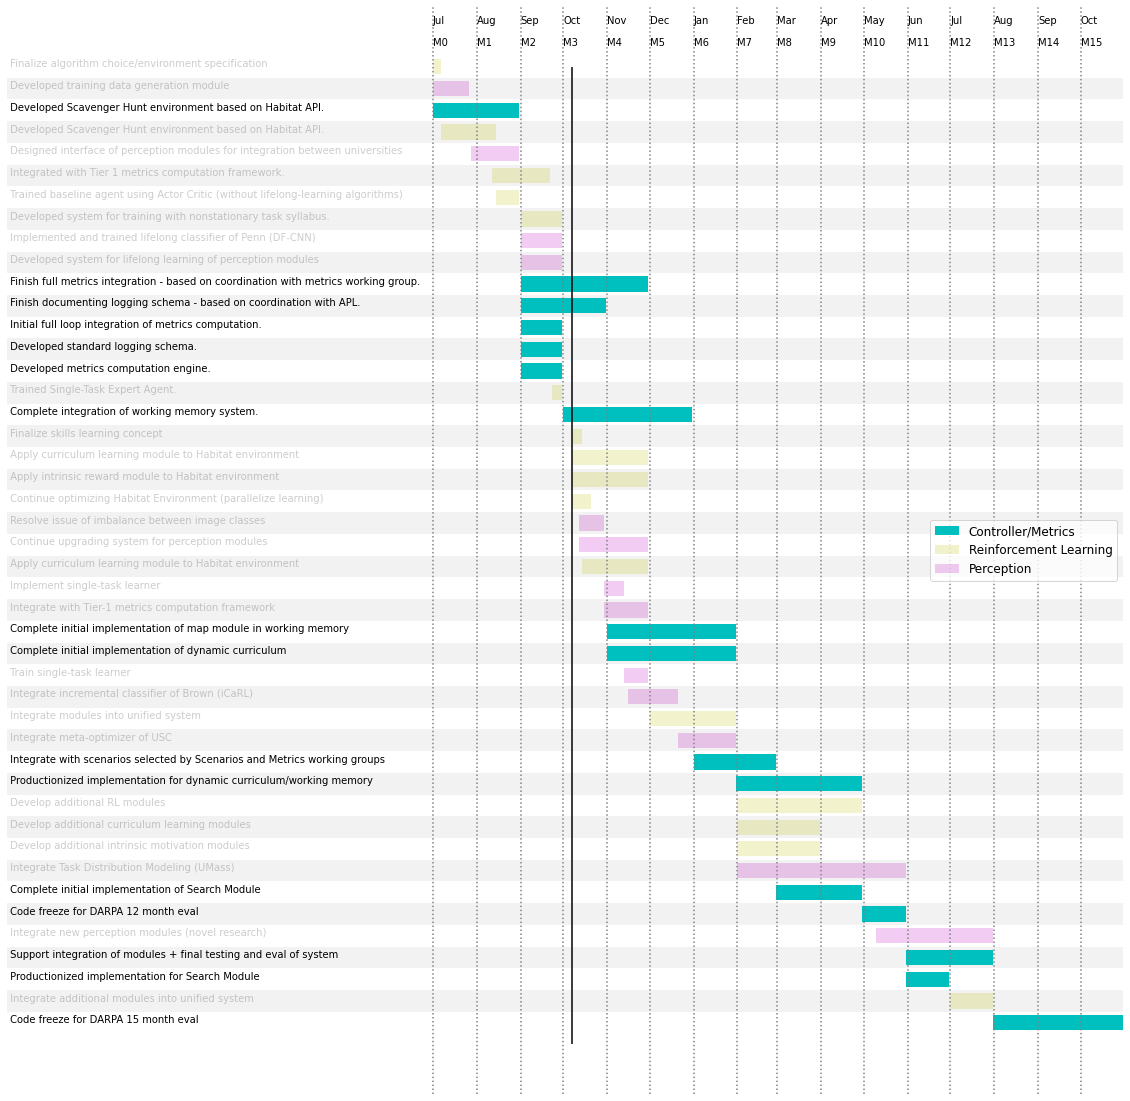

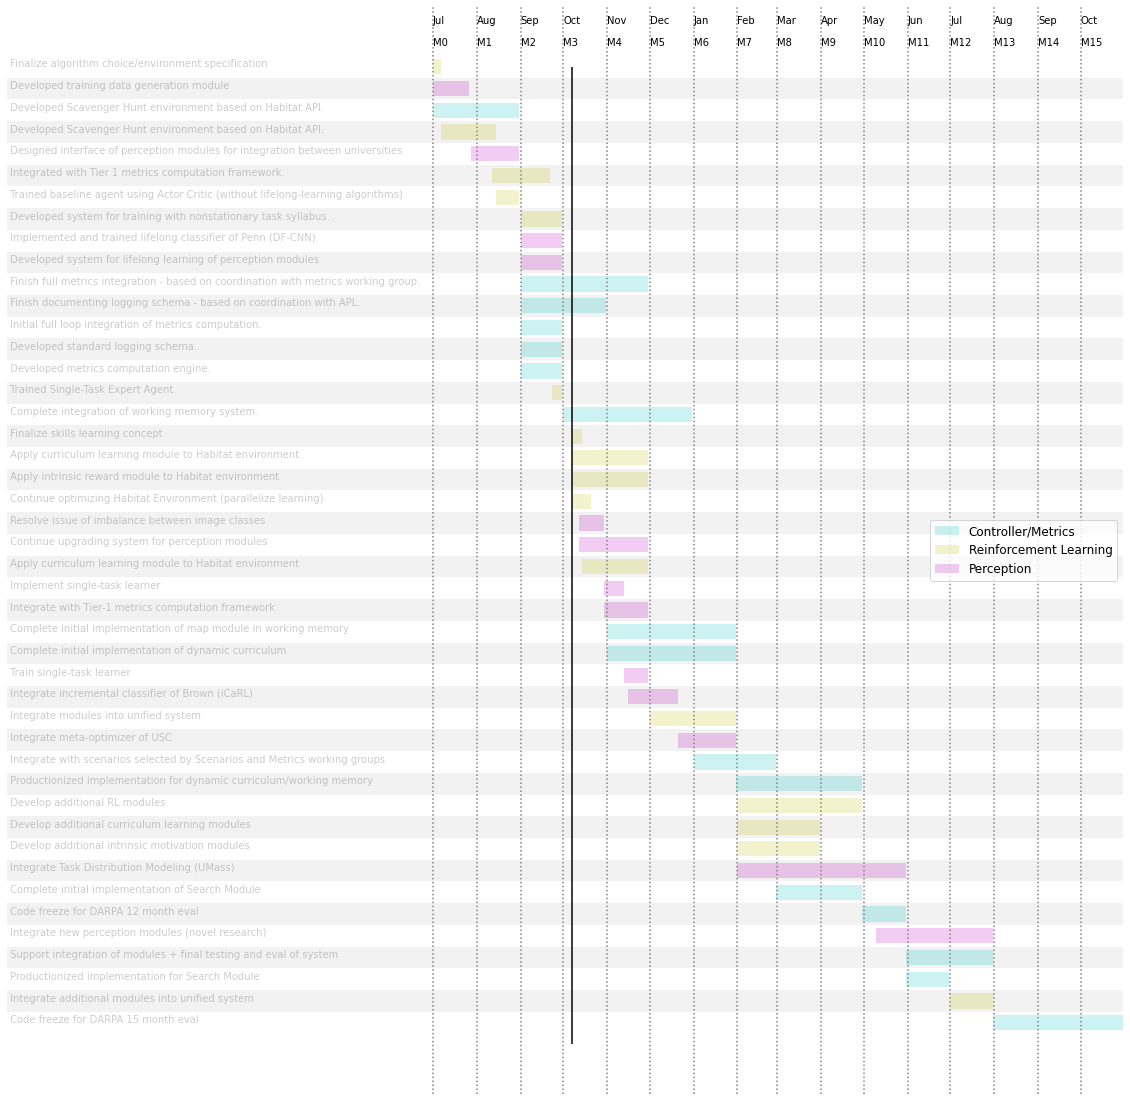

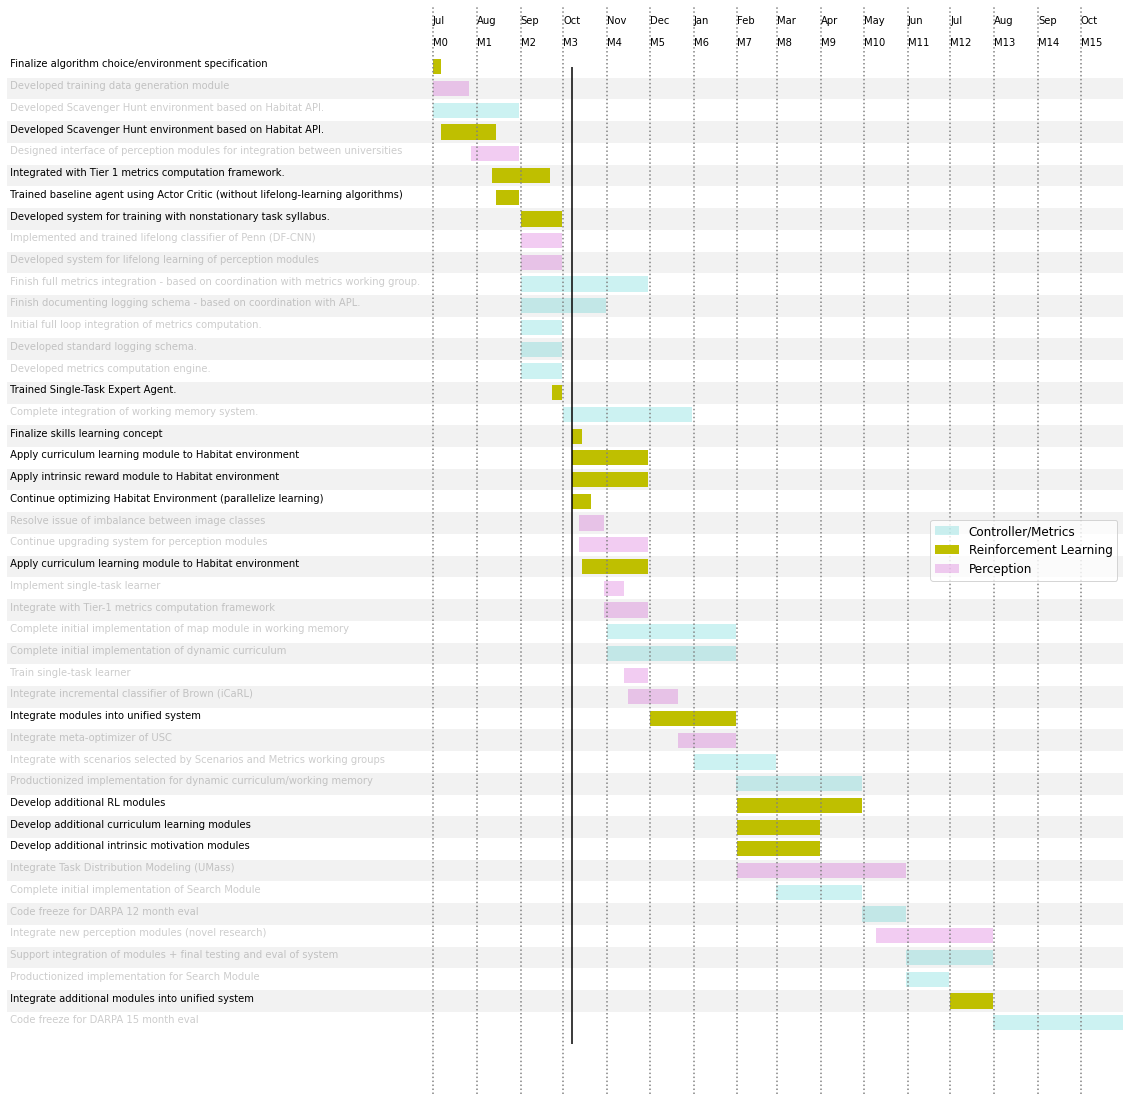

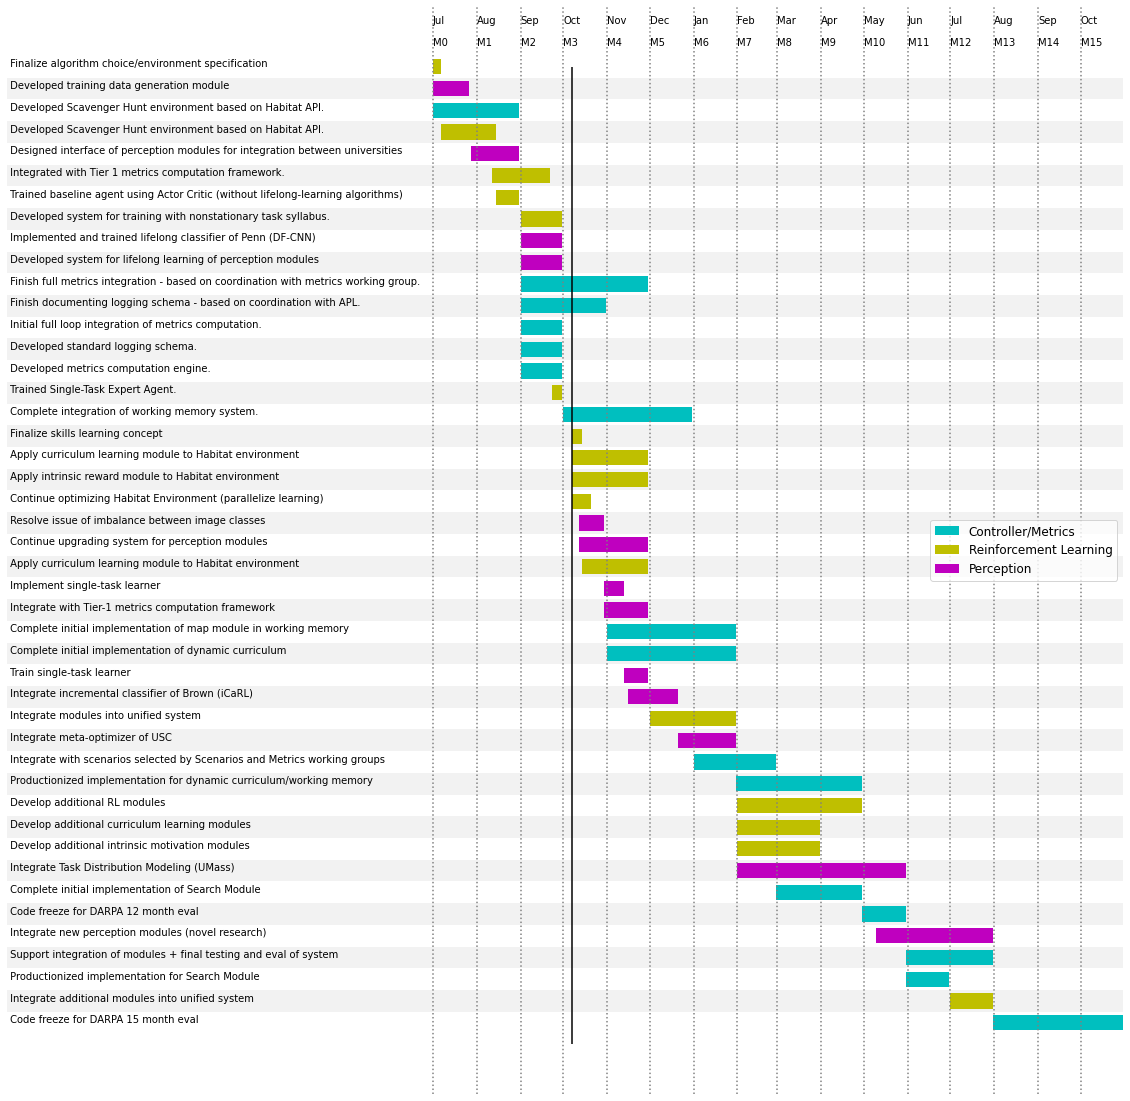

In [83]:
%matplotlib inline
from dateutil.relativedelta import relativedelta
import csv
from datetime import date, datetime
from pathlib import Path

import matplotlib.pyplot as plt

h = 20
w = 20
label_width = 300
day0 = date(2020, 7, 1)

file_names = [
    'controller-metrics.csv',
    'perception.csv',
    'rl.csv',
]


colors = [
    'c',
    'm',
    'y',
]

for highlighted, out_name in [
    ('c', 'controller'),
    ('r', 'perception'),
    ('y', 'rl'),
    ('cmy', 'full'),
]:


    def to_date(string):
        return date(*map(int, string.split('-')))

    def values_generator():
        for file_name, color in zip(file_names, colors):
            with Path('L2M Gantt - ' + file_name).open() as f:
                reader = csv.reader(f)
                subgroup = next(reader)[0]
                next(reader) # header
                for row in reader:
                    label, start, end = row
                    start = to_date(start)
                    end = to_date(end)
                    yield label, start, end, subgroup, color



    values = sorted(values_generator(), key=lambda t: t[1], reverse=True)
    # y_step = 1 / len(values)

    fig, ax = plt.subplots(figsize=(h, w))
    def days_elapsed():
        for (label, start, end, _, _) in values:
            yield (end - day0 ).days

    total_width = label_width + max(days_elapsed())
    ax.set_xlim(0, total_width)

    for y, (label, start, end, subgroup, color) in enumerate(values):
        alpha = 1 if color in highlighted else .2
        width = (end - start).days
        left = label_width + (start - day0).days
        ax.text(x=0, y=y, s=' ' + label, ha='left', wrap=True, alpha=alpha)
        ax.barh(y=y, width=total_width, height=1, left=0, color='grey', alpha=(y%2) * .1)
        ax.barh(y=y, width=width, height=.7, left=left, color=color, label=subgroup, alpha=alpha)

    ymax = len(values) - 1
    x = label_width + (datetime.now().date() - day0).days
    ax.vlines(x, ymin=-1, ymax=ymax, color='k')

    for i in range(16):
        month = day0 + relativedelta(months=i)
        days = (month - day0).days
        x = label_width + days
        ax.axvline(x, color='grey', linestyle=':')
        ax.text(x=x, y=len(values), s=f'M{i}')
        ax.text(x=x, y=1 + len(values), s=month.strftime("%b"))


    handles, labels = ax.get_legend_handles_labels()
    indexes = [labels.index(l) for l in set(labels)]
    handles = [handles[i] for i in indexes]
    labels = [labels[i] for i in indexes]
    ax.legend(handles, labels, loc='right', fontsize='large')
    ax.axis('off')
    print(out_name, highlighted)
    fig.savefig(out_name)